### Model aggregation
#### 1 Math question
For every classier which is binary independent classier, when the estimator 
$$\hat{f_D^l}>0.5 ,$$
we have :   $$sign(\hat{f_D^l})=1$$
So the prediction of the aggregation of models equal to:
$$\hat{F_D^l}=\hat\sum_{l=1}^L{w_lf_D^l}$$
with $w_l=\frac1l$   and  \hat{f_D^l} satisfy the binary distribution with p
So the prediction of the aggregation of models follows a Binomial distribution with parameters p and L


In [15]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

L=10;p=0.7
rv = binom(L, p)


The probability of correct prediction for the aggregation of models is : 0.8497316673999998


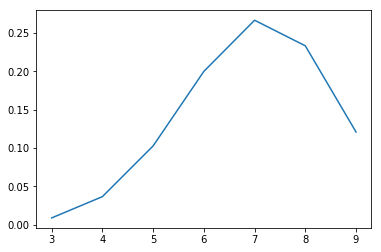

In [26]:
x = np.arange(binom.ppf(0.01, L, p),  binom.ppf(0.99, L, p))
plt.plot(x,rv.pmf(x))
s=0
for i in range(6):
    s+=rv.pmf(i)
print("The probability of correct prediction for the aggregation of models is :",1-s)

### Bagging
#### (1)Use Bagging with first decision trees of depth 1 (called stumps) and then with decision trees characterized by a greater depth.

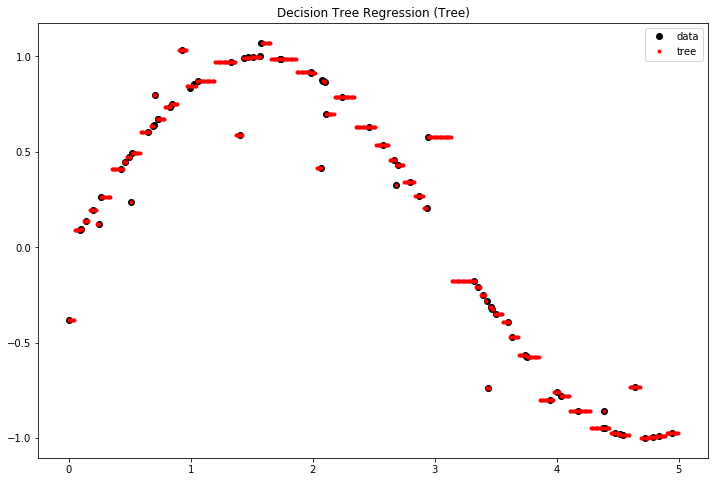

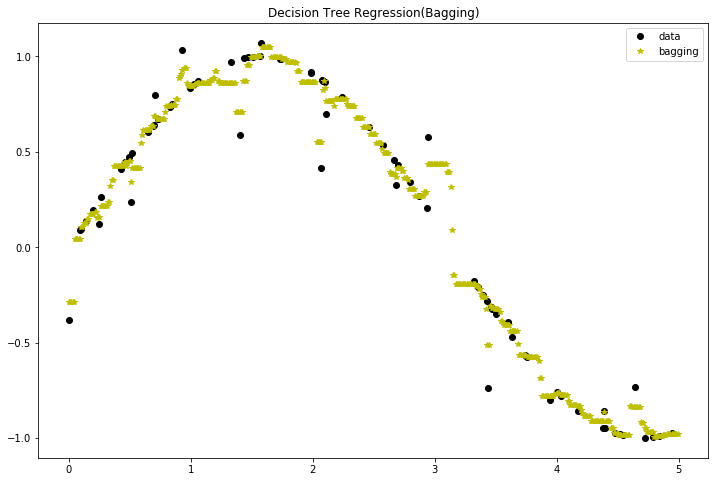

In [39]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=tree_max_depth);
tree.fit(X, y)
bagging = BaggingRegressor(n_estimators=n_estimators);
bagging.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_tree, '.', c="r", label="tree")
plt.title("Decision Tree Regression (Tree)")
plt.legend(loc=1, numpoints=1)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, '*', c="y", label="bagging")
plt.title("Decision Tree Regression(Bagging)")
plt.legend(loc=1, numpoints=1)
plt.show()


#### (2)Graphically illustrate the roles of L and of the tree depth (max_depth).

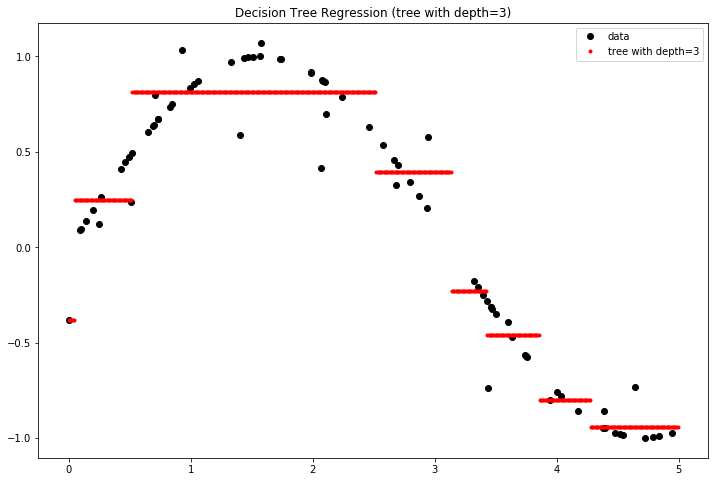

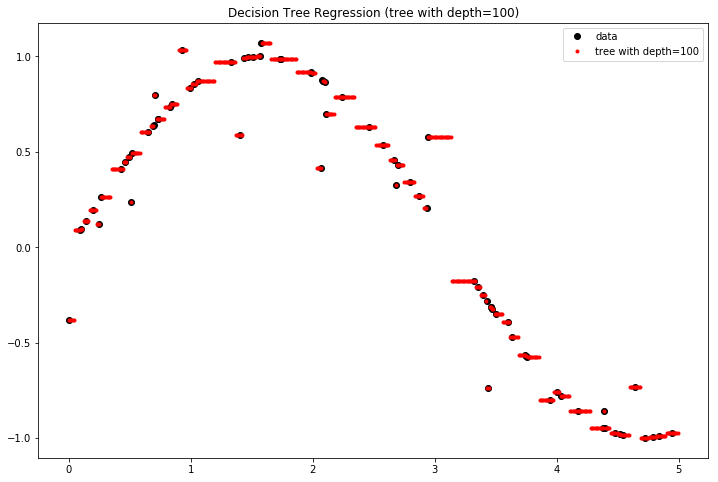

In [57]:
tree_max_depth = 3
tree = DecisionTreeRegressor(max_depth=tree_max_depth);
tree.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_tree, '.', c="r", label="tree with depth=3")
plt.title("Decision Tree Regression (tree with depth=3)")
plt.legend(loc=1, numpoints=1)
plt.show()

tree_max_depth = 100
tree = DecisionTreeRegressor(max_depth=tree_max_depth);
tree.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_tree, '.', c="r", label="tree with depth=100")
plt.title("Decision Tree Regression (tree with depth=100)")
plt.legend(loc=1, numpoints=1)
plt.show()


It's really obvious that the depth influnce the fit result. When the depth is too small like 3, the model cann't predit the detail of the data, so the accuracy is low. When the depth is too high, like 100, we find almost every point gets the exactly the value but it leads the problem of over fitting.

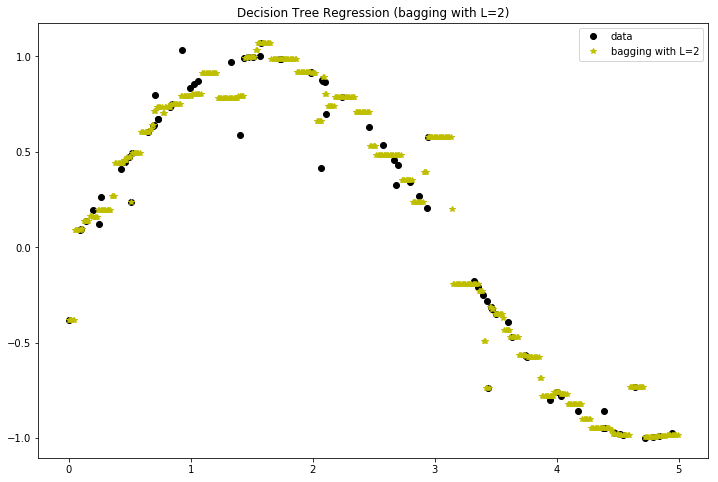

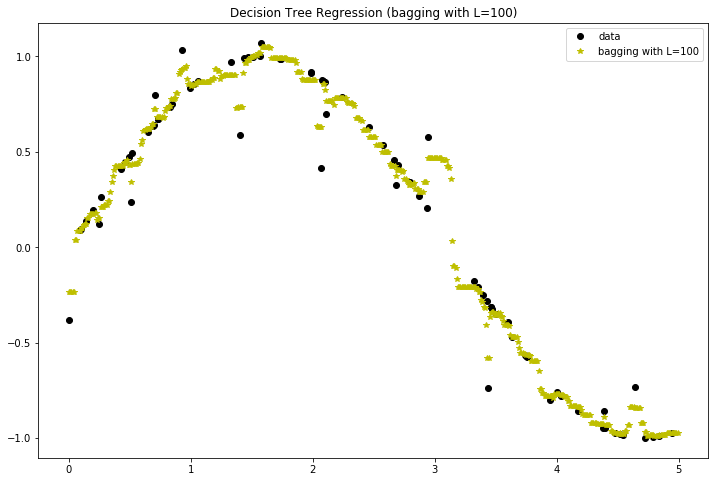

In [49]:
n_estimators = 2 # L in the text
bagging = BaggingRegressor(n_estimators=n_estimators);
bagging.fit(X, y)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, '*', c="y", label="bagging with L=2")
plt.title("Decision Tree Regression (bagging with L=2)")
plt.legend(loc=1, numpoints=1)
plt.show()

n_estimators = 100 # L in the text
bagging = BaggingRegressor(n_estimators=n_estimators);
bagging.fit(X, y)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, '*', c="y", label="bagging with L=100")
plt.title("Decision Tree Regression (bagging with L=100)")
plt.legend(loc=1, numpoints=1)
plt.show()

When the L is small which means we choose the small number of models to vote, the result looks like much rough because these model may similar and can't show the difference. However when we increase L to 100, we find that the curve become much smooth, that is because we have too many different models to vote so we have aggragate the features learned from these models.

#### (3)How can we check that the estimators computed with the decision trees are biased and that the ones based on bagging reduce the variance?

We plot the original signal sin(X) and compare the image so we could find that the decision trees are biased.

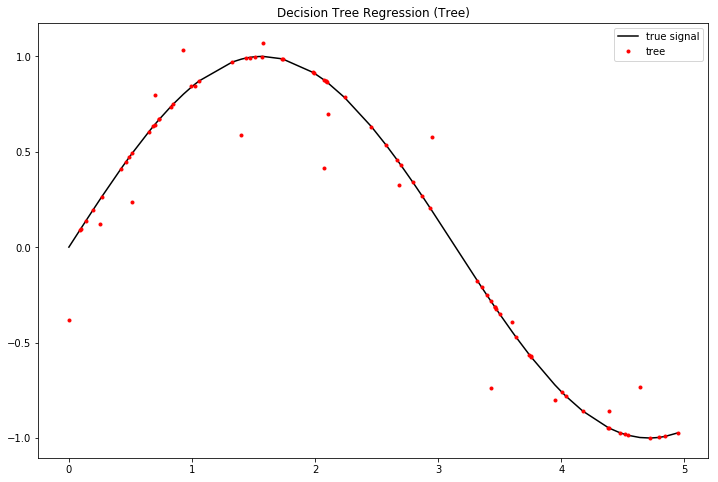

In [64]:
y_true = np.sin(X).ravel()
tree_max_depth = 10
tree = DecisionTreeRegressor(max_depth=tree_max_depth);
tree.fit(X, y)
y_tree = tree.predict(X)
plt.figure(figsize=(12, 8))
plt.plot(X, y_true, c="k", label="true signal")
plt.plot(X, y_tree, '.', c="r", label="tree")
plt.title("Decision Tree Regression (Tree)")
plt.legend(loc=1, numpoints=1)
plt.show()

We calculate the variance in the test set and we could find that the bagging way could reduce the variance.

In [67]:
n_estimators = 10 # L in the text
tree_max_depth = 10
tree = DecisionTreeRegressor(max_depth=tree_max_depth);
tree.fit(X, y)
bagging = BaggingRegressor(n_estimators=n_estimators);
bagging.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_true =  np.sin(X_test).ravel()
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)
print("The standard variance of the decision tree is :",np.var(y_tree))
print("The standard variance of the bagging is :",np.var(y_bagging))


The standard variance of the decision tree is : 0.5046596855030245
The standard variance of the bagging is : 0.48722450633139347


#### (4)Playing with the noise level, show the over-fitting (sur-apprentissage).

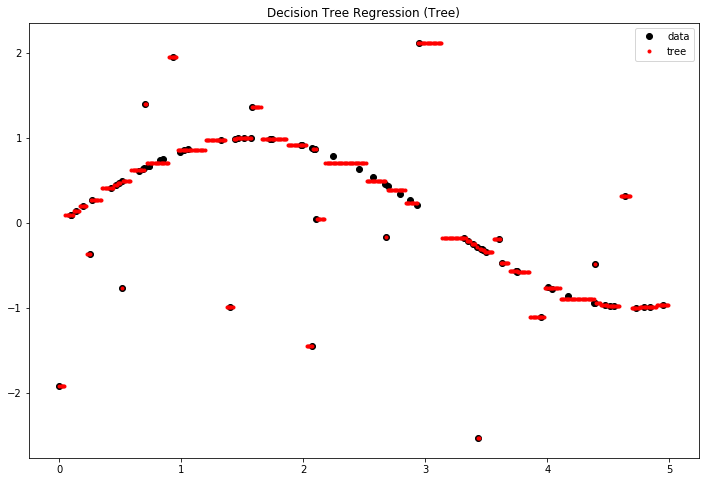

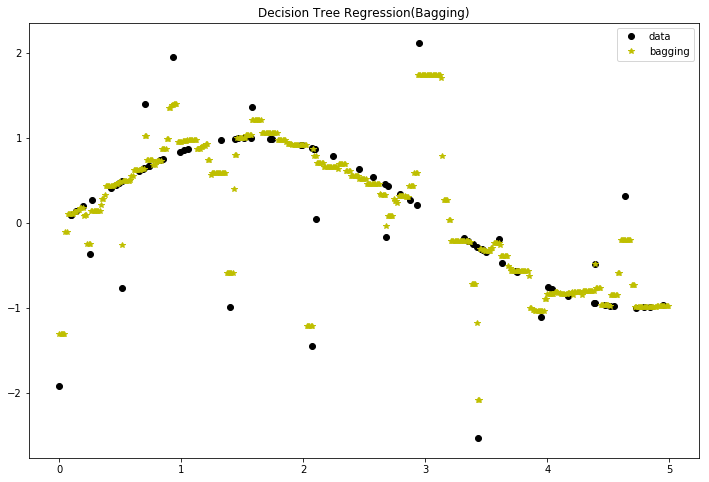

In [70]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 5 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=tree_max_depth);
tree.fit(X, y)
bagging = BaggingRegressor(n_estimators=n_estimators);
bagging.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_tree, '.', c="r", label="tree")
plt.title("Decision Tree Regression (Tree)")
plt.legend(loc=1, numpoints=1)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, '*', c="y", label="bagging")
plt.title("Decision Tree Regression(Bagging)")
plt.legend(loc=1, numpoints=1)
plt.show()

When we increase the level of noisy, we find the over-fitting phenomenon and the performence of bagging is better than decision tree which shows its advantagement.

#### (5) Show that we can reduce this phenomenon by randomly sub-sampling (sous-échantillonner) without replacement instead than taking the bootstrap samples.

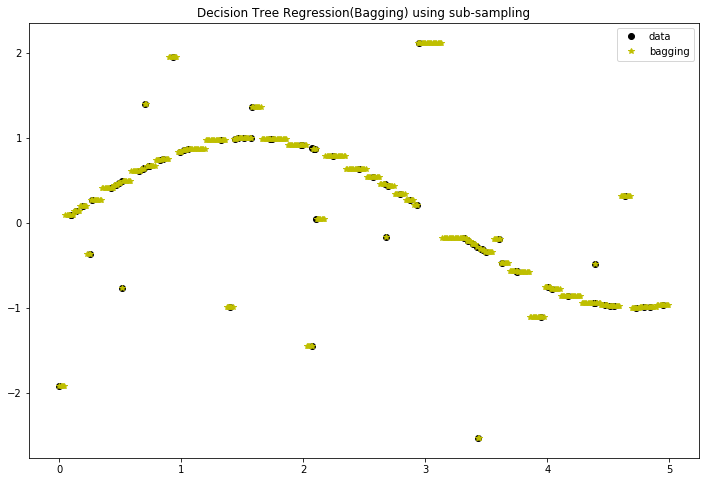

In [73]:
bagging = BaggingRegressor(n_estimators=n_estimators,bootstrap=False);
bagging.fit(X, y)
y_bagging = bagging.predict(X_test)
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, '*', c="y", label="bagging")
plt.title("Decision Tree Regression(Bagging) using sub-sampling")
plt.legend(loc=1, numpoints=1)
plt.show()

It's interesting that when we change the bootstrap sample way to sub-sampling we find the curve seems to over-fitting even more. As I understand, maybe it's the reason that we don't set the Parameter " max_samples " which has the default=1.0 which means we choose as many as sample we have. So after we reduce this value, we could compare the result below and we could say that the sub-sampling way could reduce over-fitting.

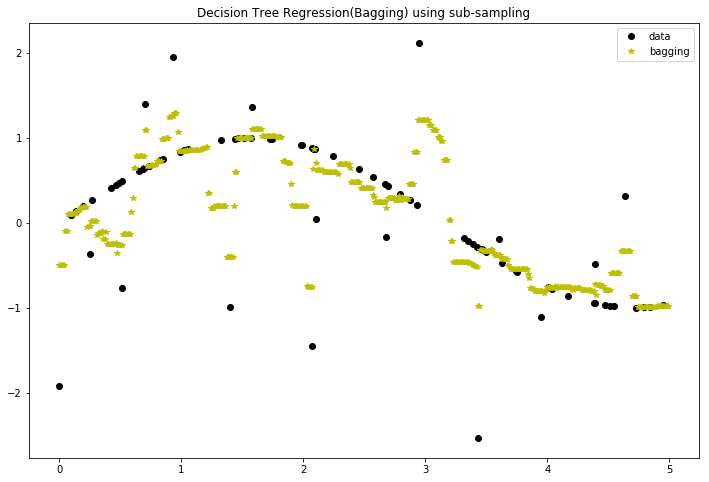

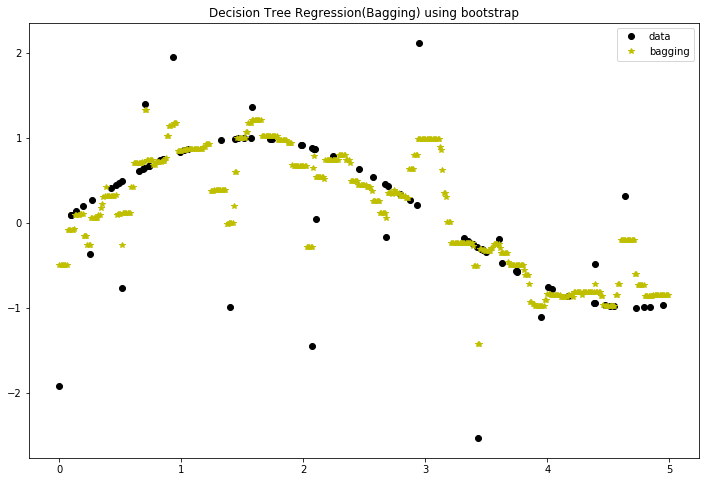

In [85]:
bagging = BaggingRegressor(n_estimators=n_estimators,bootstrap=True,max_samples=0.5);
bagging.fit(X, y)
y_bagging = bagging.predict(X_test)
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, '*', c="y", label="bagging")
plt.title("Decision Tree Regression(Bagging) using sub-sampling")
plt.legend(loc=1, numpoints=1)
plt.show()

bagging = BaggingRegressor(n_estimators=n_estimators,bootstrap=False,max_samples=0.5);
bagging.fit(X, y)
y_bagging = bagging.predict(X_test)
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, '*', c="y", label="bagging")
plt.title("Decision Tree Regression(Bagging) using bootstrap")
plt.legend(loc=1, numpoints=1)
plt.show()

### Random Forests
#### (6）Evaluate the scores using Random Forests with a 7-fold cross-validation on the data-sets boston, diabetes, iris and digits. Compare the performances with the ones of a linear SVM.

In [23]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import datasets
from sklearn import cross_validation

print("Using Random Forests with a 7-fold cross-validation:\n")


boston = datasets.load_boston()
x=boston.data
y=boston.target
clf = RandomForestRegressor()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=7)
print("The score on the date-set boston is :", score.mean())

diabetes=datasets.load_diabetes()
x=diabetes.data
y=diabetes.target
clf = RandomForestRegressor()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=7)
print("The score on the date-set diabetes is :", score.mean())

iris = datasets.load_iris()
x = iris.data
y = iris.target
#x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y)
clf = RandomForestClassifier()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=7)
print("The score on the date-set iris is :", score.mean())

digits = datasets.load_digits()
x=digits.data
y=digits.target
clf = RandomForestClassifier()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=7)
print("The score on the date-set digits is :", score.mean())

print("\nUsing a linear SVM :\n")

from sklearn.svm import SVR

boston = datasets.load_boston()
x=boston.data
y=boston.target
clf = SVR(kernel='linear')
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=7)
print("The score on the date-set boston is :", score.mean())

diabetes=datasets.load_diabetes()
x=diabetes.data
y=diabetes.target
clf = SVR(kernel='linear')
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=7)
print("The score on the date-set diabetes is :", score.mean())

iris = datasets.load_iris()
x = iris.data
y = iris.target
#x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y)
clf = SVR(kernel='linear')
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=7)
print("The score on the date-set iris is :", score.mean())

digits = datasets.load_digits()
x=digits.data
y=digits.target
clf = SVR(kernel='linear')
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=7)
print("The score on the date-set digits is :", score.mean())

Using Random Forests with a 7-fold cross-validation:

The score on the date-set boston is : 0.5777475771527911
The score on the date-set diabetes is : 0.3833810108338092
The score on the date-set iris is : 0.9396258503401361
The score on the date-set digits is : 0.9009350448137893

Using a linear SVM :

The score on the date-set boston is : 0.5111334854284131
The score on the date-set diabetes is : -0.028076437024497993
The score on the date-set iris is : 0.22069060796990453
The score on the date-set digits is : 0.49096505528281265


We find the performances of Random Forests are better than a linear SVM for all these data-sets.

#### (7）Using the data-set iris, limited to the first two variables/features, show the prediction probabilities for each class. Start from the following script where you will vary the number of random trees (parameter n_estimators).

F:\AI\Anaconda\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


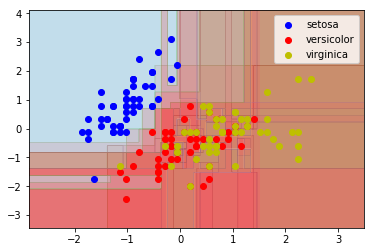

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
# Parameters
n_estimators = 5
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.figure()
Z_pro=[]
for tree in model.estimators_:
    # TODO use predict to obtain the probabilities you will store in Z
    t=[]
    for i in range(len(xx)):
        for j in range(len(xx[0])):
            t.append([xx[i][j],yy[i][j]]);
    Z = tree.predict(t)
    if (Z_pro==[]):
        Z_pro=tree.predict_proba(t)
    else:
        Z_pro+=tree.predict_proba(t)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
        cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

#### 8) Compare the scores between Random Forests with a 6-fold cross-validation and the pure decision trees (obtained with DecisionTreeClassifier), on the data-set iris limited to the first two features/variables. Vary the parameter max_depth between 1 and 30. Show that both Random Forests and decision trees reduce the over-fitting.

In [15]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import datasets
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
depth=1
#x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y)
for depth in range(1,31):
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(x, y)
    score = cross_val_score(clf, x, y, cv=6)
    print("\nWhen the max_depth = ",depth)
    print("The score of Random Forests with a 6-fold cross-validation is :", score.mean())
    clf=DecisionTreeClassifier(max_depth=depth)
    clf.fit(x, y)
    score = cross_val_score(clf, x, y, cv=6)
    print("The score of pure decision tree is :", score.mean())



When the max_depth =  1
The score of Random Forests with a 6-fold cross-validation is : 0.6805555555555557
The score of pure decision tree is : 0.6273148148148148

When the max_depth =  2
The score of Random Forests with a 6-fold cross-validation is : 0.7330246913580246
The score of pure decision tree is : 0.7345679012345679

When the max_depth =  3
The score of Random Forests with a 6-fold cross-validation is : 0.7878086419753085
The score of pure decision tree is : 0.7546296296296298

When the max_depth =  4
The score of Random Forests with a 6-fold cross-validation is : 0.753858024691358
The score of pure decision tree is : 0.7608024691358025

When the max_depth =  5
The score of Random Forests with a 6-fold cross-validation is : 0.7206790123456791
The score of pure decision tree is : 0.7469135802469137

When the max_depth =  6
The score of Random Forests with a 6-fold cross-validation is : 0.7052469135802468
The score of pure decision tree is : 0.7399691358024691

When the max_dep

We notice that both Random Forests and decision trees reduce the over-fitting, the scores increase then decrease and don't cause over fitting phenomenon.

#### 9) Using boston (regression) and iris (classification, limited to the first two variables/features) datasets,compare the performance of Extra random trees with Random Forest using 5-fold crossvalidation.

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

boston = datasets.load_boston()
x=boston.data
y=boston.target
clf = RandomForestRegressor()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=5)
print("The performance on the date-set boston :")
print("The score of Random Forest is: ",score.mean())

clf = ExtraTreesRegressor()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=5)
print("The score of Extra random trees is ",score.mean())

iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
clf = RandomForestClassifier()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=5)
print("\nThe performance on the date-set iris :")
print("The score of Random Forest is: ",score.mean())

clf = ExtraTreesClassifier()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=5)
print("The score of Extra random trees is ",score.mean())

The performance on the date-set boston :
The score of Random Forest is:  0.607644507861869
The score of Extra random trees is  0.6111823880441596

The performance on the date-set iris :
The score of Random Forest is:  0.74
The score of Extra random trees is  0.7266666666666668


#### 10) Plot the feature importance (using an appropriate graphical tool) on both algorithms with iris dataset. Do we observe a difference ? If so, explain why.

In [48]:
def plot_feature_importances(feature_importances,title,feature_names):
#     将重要性值标准化
    feature_importances = 100.0*(feature_importances/max(feature_importances))
#     将得分从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
#     让X坐标轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0])+0.5
    plt.figure(figsize=(16,4))
    plt.bar(pos,feature_importances[index_sorted],align='center')
    plt.xticks(pos,np.array(feature_names)[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()


In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The features are : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The feature importance of Random Forest is:  [0.05483485 0.01348628 0.48319484 0.44848403]


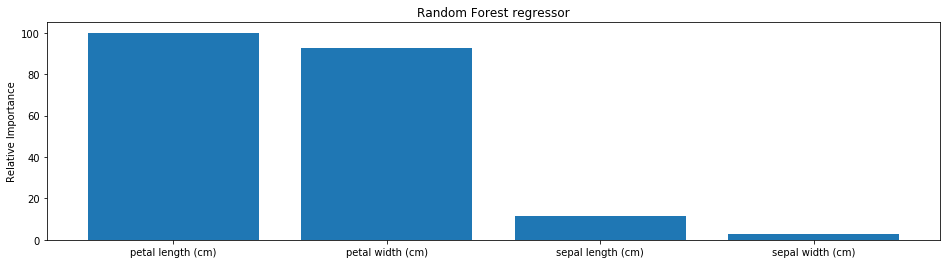

The features are : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The feature importance of Extra random trees is:  [0.08209603 0.03930895 0.41883961 0.45975541]


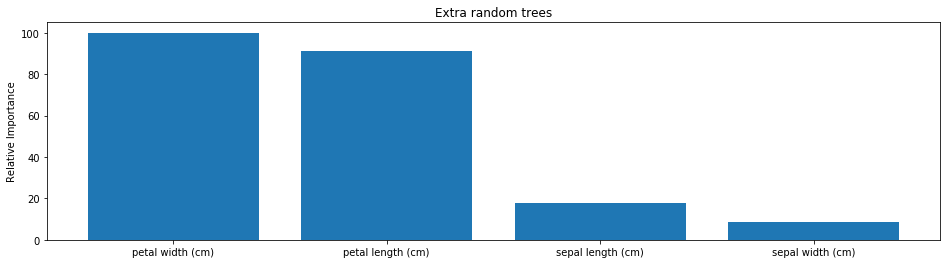

In [51]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
clf = RandomForestClassifier()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=5)
print("The features are :",iris.feature_names)
print("The feature importance of Random Forest is: ",clf.feature_importances_)
plot_feature_importances(clf.feature_importances_,'Random Forest regressor',iris.feature_names)

clf = ExtraTreesClassifier()
clf.fit(x, y)
score = cross_val_score(clf, x, y, cv=5)
print("The features are :",iris.feature_names)
print("The feature importance of Extra random trees is: ",clf.feature_importances_)
plot_feature_importances(clf.feature_importances_,'Extra random trees',iris.feature_names)



The importances of features between Random Forest and Extra random trees have not great difference. 